![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 6.5
## Feature Selection

### Data

**Predict the onset of diabetes based on diagnostic measures.**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1)

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load Data

In [2]:
# Read Data
diabetes_csv = pd.read_csv('diabetes.csv')

diabetes_csv.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 2. Perform EDA

Perform EDA. Check Null Values. Impute if necessary.

In [3]:
# Describe features

diabetes_csv.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes_csv['Outcome'].value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

- Zero values in glucose, blood pressure, insulin, BMI aren't possible
  - Impute median

In [5]:
# Check Null values

diabetes_csv.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

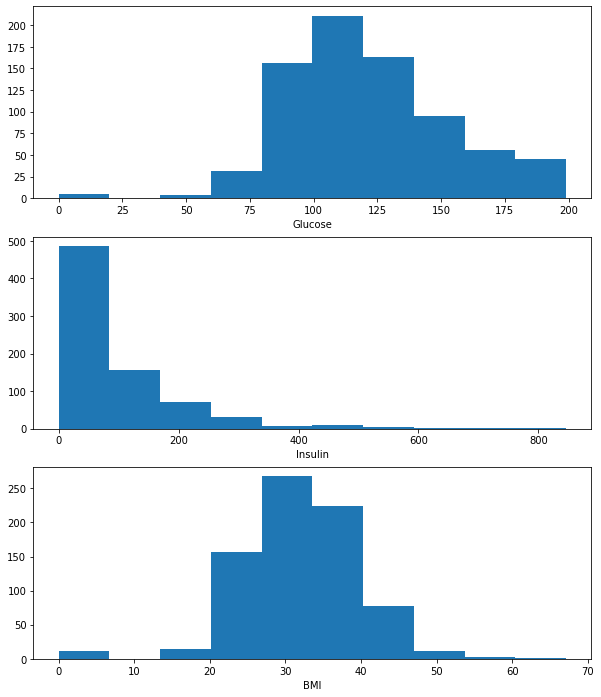

In [6]:
# Visualise distribution

fig = plt.figure(figsize=(10, 12))

for i, col in enumerate(['Glucose', 'Insulin', 'BMI']):
    
    ax = fig.add_subplot(3, 1, i+1)
    ax.hist(diabetes_csv[col])
    ax.set_xlabel(col)
    
plt.show()    

In [7]:
# Impute median for columns Glucose, BloodPressure, Insulin, BMI

for col in ['Glucose', 'BloodPressure', 'Insulin', 'BMI']:
    
    # Find median
    
    median = diabetes_csv[col].median()
    
    # Replace zeroes with median
    
    diabetes_csv[col+'_imp'] = diabetes_csv[col].replace(0, median)
    
diabetes_csv.head()    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,Insulin_imp,BMI_imp
0,6,148,72,35,0,33.6,0.627,50,1,148,72,30.5,33.6
1,1,85,66,29,0,26.6,0.351,31,0,85,66,30.5,26.6
2,8,183,64,0,0,23.3,0.672,32,1,183,64,30.5,23.3
3,1,89,66,23,94,28.1,0.167,21,0,89,66,94.0,28.1
4,0,137,40,35,168,43.1,2.288,33,1,137,40,168.0,43.1


In [8]:
def categorise_bmi(x):
    
    if x <= 18.5:
        return 1
    elif x > 18.5 and x < 25:
        return 2
    elif x >= 25 and x < 30:
        return 3
    else:
        return 4

In [9]:
diabetes_csv['BMI_range'] = diabetes_csv['BMI_imp'].apply(categorise_bmi)

diabetes_csv['BMI_range'].value_counts(dropna=False)

4    483
3    179
2    102
1      4
Name: BMI_range, dtype: int64

In [10]:
def categorise_insulin(x):
    
    if x <= 30:
        return 1
    elif x > 30 and x <= 100:
        return 2
    elif x > 100 and x <= 200:
        return 3
    else:
        return 4

In [11]:
diabetes_csv['Insulin_range'] = diabetes_csv['Insulin_imp'].apply(categorise_insulin)

diabetes_csv['Insulin_range'].value_counts(dropna=False)

2    515
3    158
4     85
1     10
Name: Insulin_range, dtype: int64

#### 3. Set Target

- Set `Outcome` as target.
- Set Features 

In [12]:
# Set outcome

y = diabetes_csv['Outcome']
X = diabetes_csv.drop(['Outcome', 'Glucose', 'BloodPressure', 'Insulin', 'BMI'], axis=1)

X.head()

,Pregnancies,SkinThickness,DiabetesPedigreeFunction,Age,Glucose_imp,BloodPressure_imp,Insulin_imp,BMI_imp,BMI_range,Insulin_range
0,6,35,0.627,50,148,72,30.5,33.6,4,2
1,1,29,0.351,31,85,66,30.5,26.6,3,2
2,8,0,0.672,32,183,64,30.5,23.3,2,2
3,1,23,0.167,21,89,66,94.0,28.1,3,2
4,0,35,2.288,33,137,40,168.0,43.1,4,3


#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y 
- Find top 4 features
- Transform features to a DataFrame

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

In [14]:
# Create an instance of SelectKBest

kbest = SelectKBest(f_classif, k=4)

In [15]:
# Fit 

kbest.fit(X, y)

SelectKBest(k=4, score_func=<function f_classif at 0x0000012761828AF8>)

In [16]:
# Print Score 
# Find Top 4 Features

scores = kbest.fit(X, y).scores_
scores_df = pd.DataFrame({'feature': X.columns.tolist(),
                          'score': scores})

scores_df.sort_values('score', ascending=False).head()

,feature,score
4,Glucose_imp,245.667855
7,BMI_imp,82.752950
8,BMI_range,81.300863
3,Age,46.140611
0,Pregnancies,39.670227


In [17]:
features_sel = kbest.get_support()

X.columns[features_sel]

Index(['Age', 'Glucose_imp', 'BMI_imp', 'BMI_range'], dtype='object')

In [18]:
# Transform X to Features

X_selected = kbest.transform(X)

X_selected.shape

(768, 4)

In [19]:
# Transform features to a dataframe

X_new = pd.DataFrame(data=X_selected, columns=X.columns[features_sel].tolist())
X_new.head()

,Age,Glucose_imp,BMI_imp,BMI_range
0,50.0,148.0,33.6,4.0
1,31.0,85.0,26.6,3.0
2,32.0,183.0,23.3,2.0
3,21.0,89.0,28.1,3.0
4,33.0,137.0,43.1,4.0


##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [21]:
# ANSWER

rfe = RFE(LogisticRegression(solver='lbfgs', max_iter=1000), n_features_to_select=4)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=1000,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=4, step=1, verbose=0)

In [22]:
# Print Score 

print("Score: ", rfe.score(X, y))

# Find Features

print("Features chosen: ", ", ".join(X.columns[rfe.support_].tolist()))

Score:  0.6953125
Features chosen:  Pregnancies, DiabetesPedigreeFunction, BMI_range, Insulin_range


## Next Steps

1. Normalize data
2. Split data into training and test
3. Find baseline accuracy with naive model
4. Choose model and 
5. Fit with one feature and score
6. Fit with all features and score
7. Fit with selected features and score

## Baseline Model

In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [24]:
X.head()

,Pregnancies,SkinThickness,DiabetesPedigreeFunction,Age,Glucose_imp,BloodPressure_imp,Insulin_imp,BMI_imp,BMI_range,Insulin_range
0,6,35,0.627,50,148,72,30.5,33.6,4,2
1,1,29,0.351,31,85,66,30.5,26.6,3,2
2,8,0,0.672,32,183,64,30.5,23.3,2,2
3,1,23,0.167,21,89,66,94.0,28.1,3,2
4,0,35,2.288,33,137,40,168.0,43.1,4,3


In [25]:
# Scale data

scaler = StandardScaler() 

X_scale = scaler.fit_transform(X.drop(['BMI_range', 'Insulin_range'], axis=1))

In [26]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, stratify=y, test_size=0.2, random_state=12)

In [27]:
# Fit baseline model

dummy = DummyClassifier(strategy='most_frequent', random_state=12) # most_frequent always predicts the most frequent label 
                                                                   # in the training set 

dummy.fit(X_train, y_train)

dummy_preds = dummy.predict(X_test)

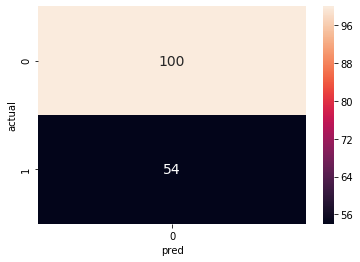

In [28]:
# Make confusion matrix

dummy_pred_df = pd.DataFrame({'pred': dummy_preds,
                              'actual': y_test})

dummy_conf_mat = pd.crosstab(dummy_pred_df['actual'], dummy_pred_df['pred'])

sns.heatmap(dummy_conf_mat, annot=True, fmt='d', annot_kws={"size": 14})
plt.show()

In [29]:
# Store accuracy scores in dictionary

accuracy_scores = {}

accuracy_scores['Dummy'] = [dummy.score(X_train, y_train), dummy.score(X_test, y_test)]

# Print train and test accuracy

print('Training accuracy:', accuracy_scores['Dummy'][0])
print('Test accuracy:', accuracy_scores['Dummy'][1])

Training accuracy: 0.6514657980456026
Test accuracy: 0.6493506493506493


## Univariate model

In [30]:
# Instantiate model

logreg_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=12)

# Select Glucose_imp

X_train_glu = X_train[:, 4].reshape(-1, 1) 
X_test_glu = X_test[:, 4].reshape(-1, 1)

# Fit

logreg_cv.fit(X_train_glu, y_train)

# Predict

uni_logreg_preds = logreg_cv.predict(X_test_glu)

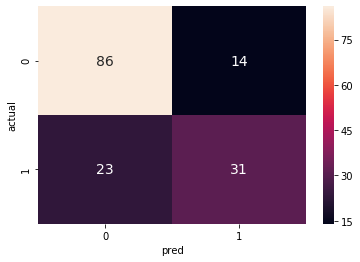

In [31]:
# Make confusion matrix

uni_logreg_pred_df = pd.DataFrame({'pred': uni_logreg_preds,
                                   'actual': y_test})

uni_logreg_conf_mat = pd.crosstab(uni_logreg_pred_df['actual'], 
                                  uni_logreg_pred_df['pred'])

sns.heatmap(uni_logreg_conf_mat, annot=True, fmt='d', annot_kws={"size": 14})
plt.show()

In [32]:
# Store accuracy scores

accuracy_scores['Logistic (Univariate)'] = [logreg_cv.score(X_train_glu, y_train), 
                                            logreg_cv.score(X_test_glu, y_test)]

In [33]:
# Compare accuracy scores

round(pd.DataFrame(accuracy_scores, index=['Training', 'Test']).T, 2)

,Training,Test
Dummy,0.65,0.65
Logistic (Univariate),0.74,0.76


## All features

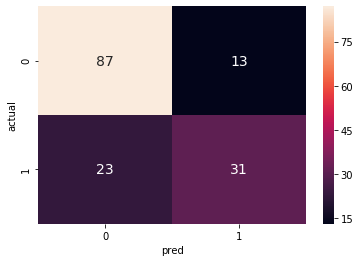

In [34]:
# Fit

logreg_cv.fit(X_train, y_train)

# Predict

multi_logreg_preds = logreg_cv.predict(X_test)

# Make confusion matrix

multi_logreg_pred_df = pd.DataFrame({'pred': multi_logreg_preds,
                                   'actual': y_test})

multi_logreg_conf_mat = pd.crosstab(multi_logreg_pred_df['actual'], 
                                    multi_logreg_pred_df['pred'])

sns.heatmap(multi_logreg_conf_mat, annot=True, fmt='d', annot_kws={"size": 14})
plt.show()

In [35]:
# Store accuracy scores

accuracy_scores['Logistic (Multivariate)'] = [logreg_cv.score(X_train, y_train), 
                                              logreg_cv.score(X_test, y_test)]

# Show accuracy scores

round(pd.DataFrame(accuracy_scores, index=['Training', 'Test']).T, 2)

,Training,Test
Dummy,0.65,0.65
Logistic (Univariate),0.74,0.76
Logistic (Multivariate),0.77,0.77


## Selected features

In [36]:
# Select Age, Glucose_imp, BMI_imp

X_train_sel = X_train[:, [3, 4, 7]]
X_test_sel = X_test[:, [3, 4, 7]]

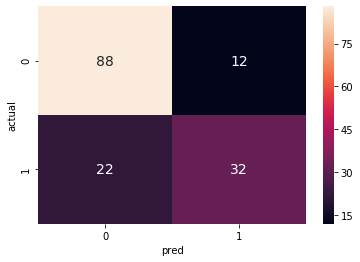

In [37]:
# Fit

logreg_cv.fit(X_train_sel, y_train)

# Predict

sel_logreg_preds = logreg_cv.predict(X_test_sel)

# Make confusion matrix

sel_logreg_pred_df = pd.DataFrame({'pred': sel_logreg_preds,
                                   'actual': y_test})

sel_logreg_conf_mat = pd.crosstab(sel_logreg_pred_df['actual'], 
                                    sel_logreg_pred_df['pred'])

sns.heatmap(sel_logreg_conf_mat, annot=True, fmt='d', annot_kws={"size": 14})
plt.show()

In [38]:
# Store accuracy scores

accuracy_scores['Logistic (Selected)'] = [logreg_cv.score(X_train_sel, y_train), 
                                              logreg_cv.score(X_test_sel, y_test)]

# Show accuracy scores

round(pd.DataFrame(accuracy_scores, index=['Training', 'Test']).T, 2)

,Training,Test
Dummy,0.65,0.65
Logistic (Univariate),0.74,0.76
Logistic (Multivariate),0.77,0.77
Logistic (Selected),0.77,0.78


### Create function for model evaluation

`evaluate_classification_model`

 - __INPUT:__ Features, target, model
 - __OUTPUT:__ Metrics, Confusion matrix, ROC curve 

In [39]:
from sklearn.metrics import accuracy_score, auc, average_precision_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve

In [40]:
def evaluate_classification_model(model, X, y, test_size=0.2, random_state=12):
    
    # Check if X is a single feature and reshape if true
    
    if len(X.shape) == 1:
        X1 = X.values.reshape(-1, 1)
    else:
        X1 = X.copy()
    
    # Normalise data
    
    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X1)
    
    # Split data
    
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y, stratify=y, test_size=test_size, random_state=random_state)
    
    # Fit model and make predictions
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)
    
    # Calculate metrics
    accuracy_ = accuracy_score(y_test, preds)
    precision_ = precision_score(y_test, preds)
    recall_ = recall_score(y_test, preds)

    # Confusion Matrix
    mat = confusion_matrix(y_test, preds)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, probs[:, 1])
    roc_auc = auc(fpr, tpr)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('AUC      : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # plot
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # ROC
    ax[1].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[1].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver Operating Characteristic')
    ax[1].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc)

Accuracy : 0.7662 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6800 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6296 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
AUC      : 0.8687                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


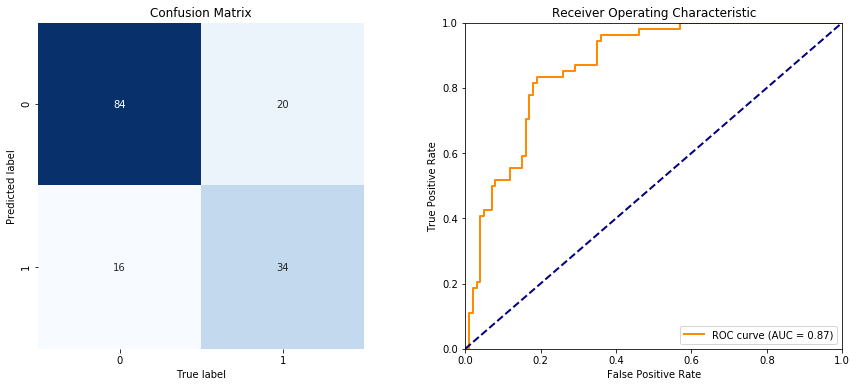

In [41]:
logreg_metrics = evaluate_classification_model(logreg_cv, X, y)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Accuracy : 0.7662 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6800 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6296 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
AUC      : 0.8687                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


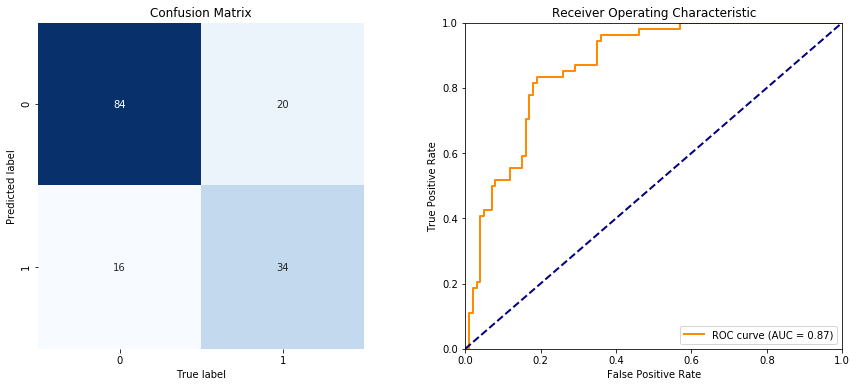

Accuracy : 0.7987 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7347 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6667 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
AUC      : 0.8489                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


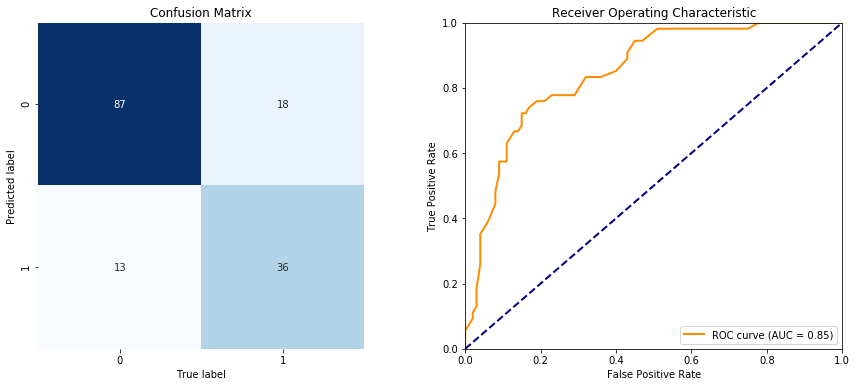

Accuracy : 0.7078 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
AUC      : 0.7477                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


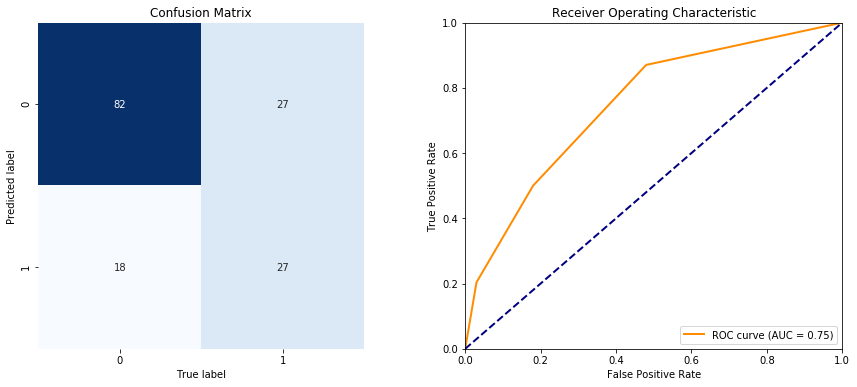

Accuracy : 0.7532 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6905 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5370 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
AUC      : 0.8057                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


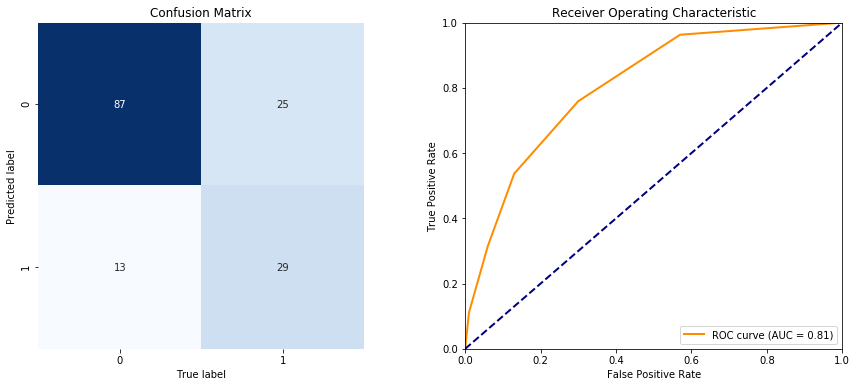

In [43]:
# Instantiate KNN and RF models

rf = RandomForestClassifier(n_estimators=50)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_3 = KNeighborsClassifier(n_neighbors=3)

# Evaluate multiple models

model_list = [logreg_cv, rf, knn_3, knn_5]

metrics_list = [evaluate_classification_model(model, X, y, test_size=0.2, random_state=12) for model in model_list]
    
metrics_df = pd.DataFrame(metrics_list, 
                          columns=['accuracy', 'precision', 'recall', 'auc'], 
                          index=['Logistic Regression', 'Random Forest', 'KNN (3 clusters)', 'KNN (5 clusters)'])    

In [44]:
metrics_df

,accuracy,precision,recall,auc
Logistic Regression,0.766234,0.680000,0.629630,0.868704
Random Forest,0.798701,0.734694,0.666667,0.848889
KNN (3 clusters),0.707792,0.600000,0.500000,0.747685
KNN (5 clusters),0.753247,0.690476,0.537037,0.805741
